#  Task1: Data Exploration, Pre-Processing and Augmentation

In [90]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import RandomBrightness, RandomContrast, RandomRotation
from tensorflow.keras.models import Sequential
import importlib

# Import the modules normally
import src.loading as loading
import src.exploration as exploration
import src.preprocessing as preprocessing

# Reload the modules to overwrite any previously imported functions
importlib.reload(loading)
importlib.reload(exploration)
importlib.reload(preprocessing)

<module 'src.preprocessing' from 'c:\\Users\\seppe\\AI project\\AI-project\\notebooks\\src\\preprocessing.py'>

## 1. Loading the data

In [91]:
# Set up your Image Generators for the training, validation, and test data.
img_height, img_width = 299, 299
batch_size = 100

path_train = "../data/train"
path_val = "../data/val"
path_test = "../data/test"

train_data_gen = tf.keras.utils.image_dataset_from_directory(path_train,
                                                             label_mode='binary',
                                                             batch_size=batch_size,
                                                             image_size=(img_height, img_width),
                                                             shuffle=True,
                                                             color_mode="grayscale")

val_data_gen = tf.keras.utils.image_dataset_from_directory(path_val,
                                                           label_mode='binary',
                                                           batch_size=batch_size,
                                                           image_size=(img_height, img_width),
                                                           shuffle=False,
                                                           color_mode="grayscale")

test_data_gen = tf.keras.utils.image_dataset_from_directory(path_test,
                                                           label_mode='binary',
                                                           batch_size=batch_size,
                                                           image_size=(img_height, img_width),
                                                           shuffle=False,
                                                           color_mode="grayscale")

Found 1600 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [92]:
print(train_data_gen.class_names)

['COVID', 'NORMAL']


In [93]:
# Load the datasets as arrays.
X_train, y_train, labels_train = loading.generator_to_array(train_data_gen)
X_val, y_val, labels_val = loading.generator_to_array(val_data_gen)
X_test, y_test, labels_test = loading.generator_to_array(test_data_gen)

## 2. Data exploration

### Training data

Input shape: (1600, 299, 299, 1), Output shape: (1600,)
All images are of the same size: True


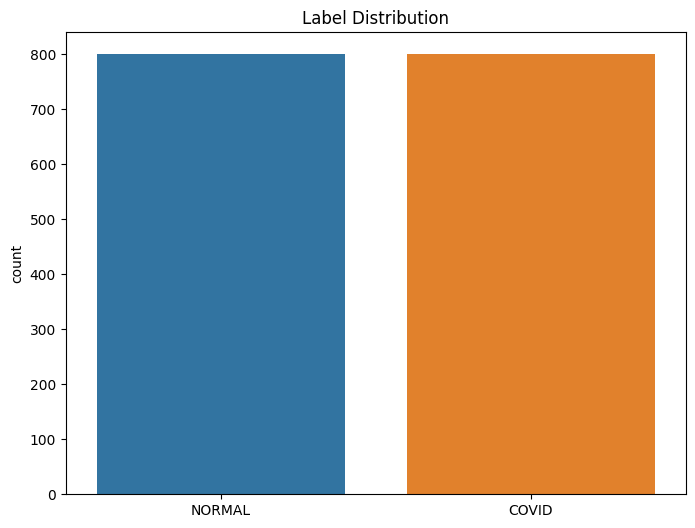

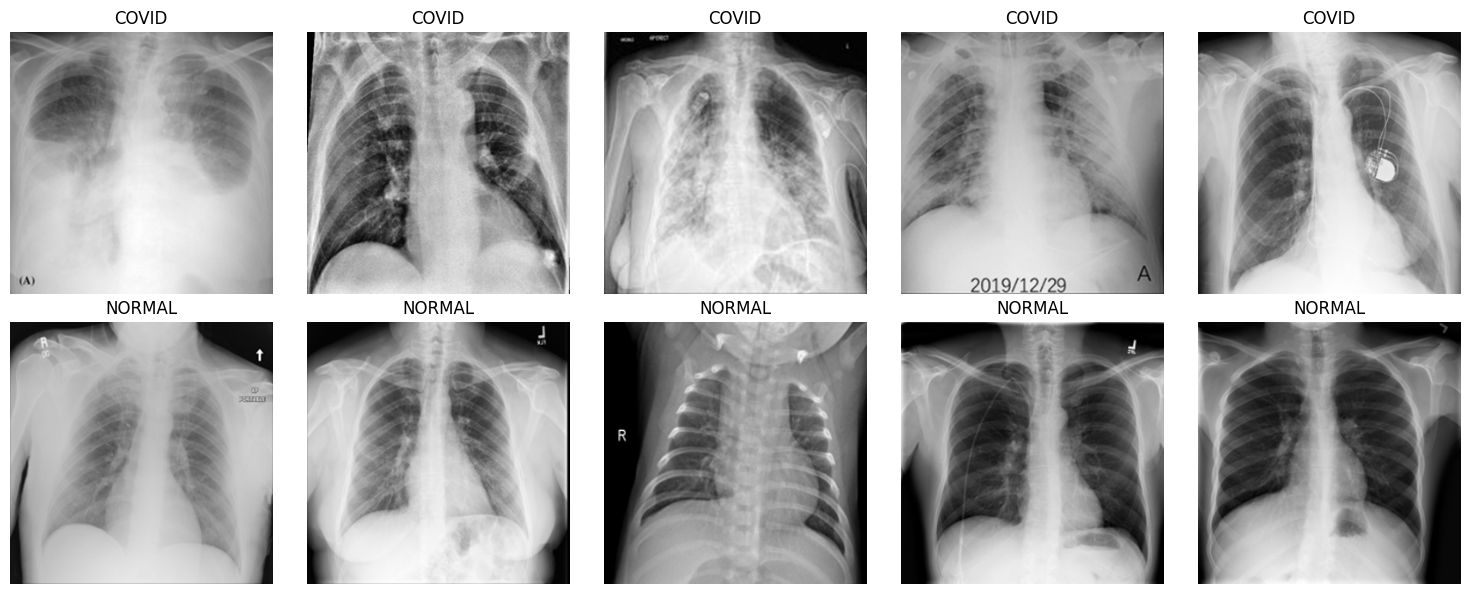

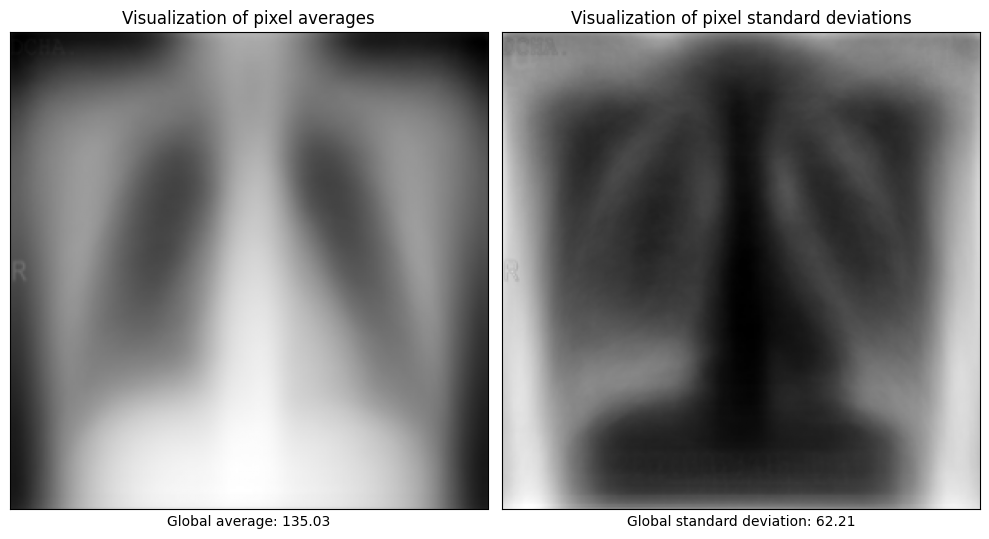

In [94]:
# Prints the dataset size, whether all images have the same size, the distribution of the two classes, a few examples and some statistics
exploration.run_all_exploration(X_train, labels_train)

### Validation data

Input shape: (400, 299, 299, 1), Output shape: (400,)
All images are of the same size: True


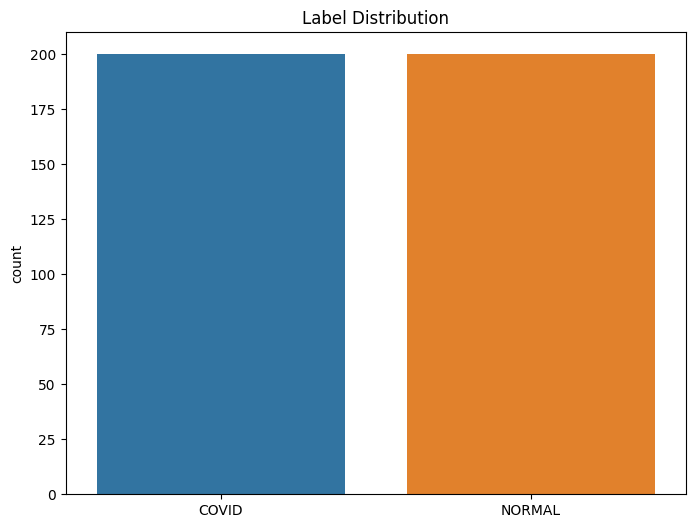

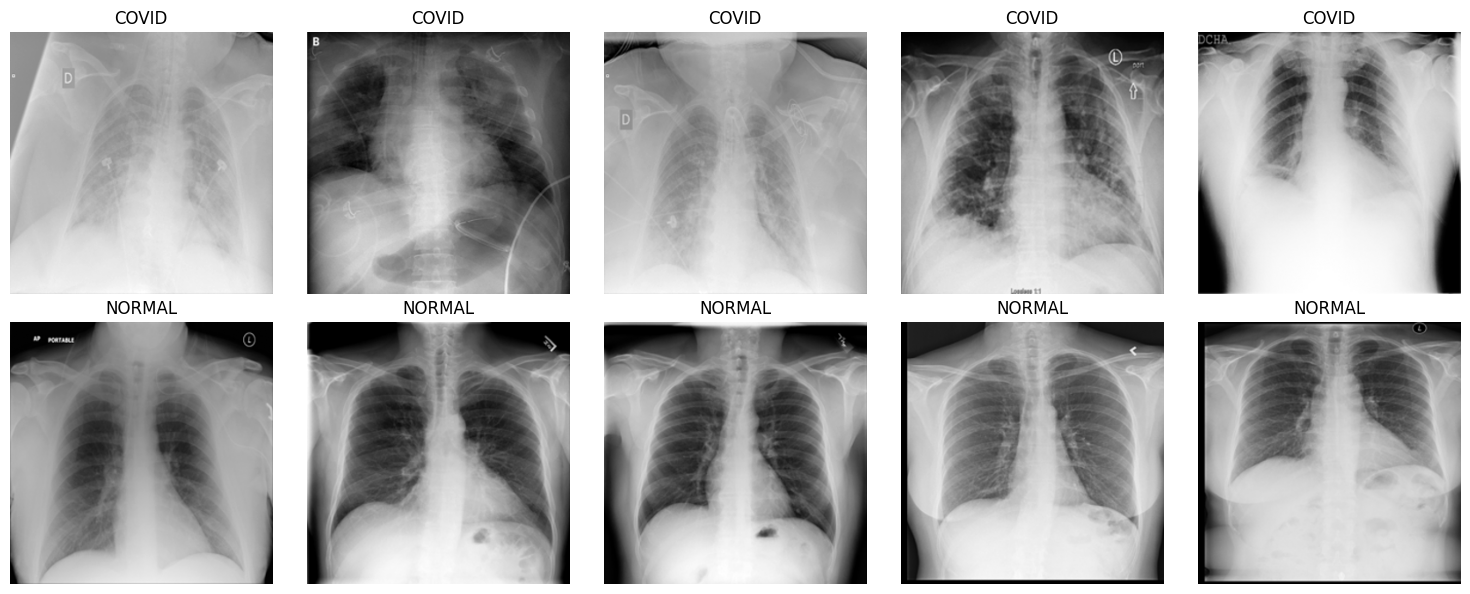

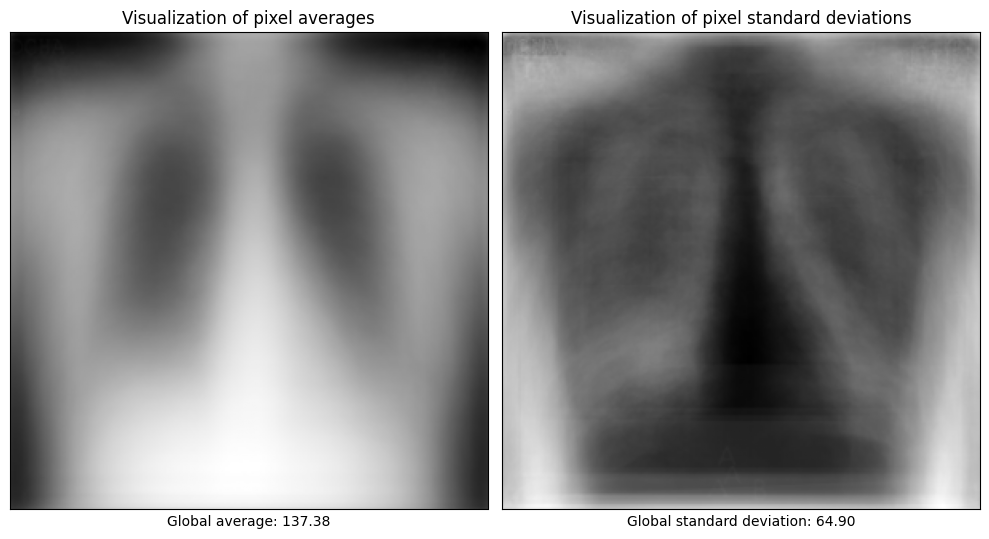

In [95]:
exploration.run_all_exploration(X_val, labels_val)

### Test data

Input shape: (200, 299, 299, 1), Output shape: (200,)
All images are of the same size: True


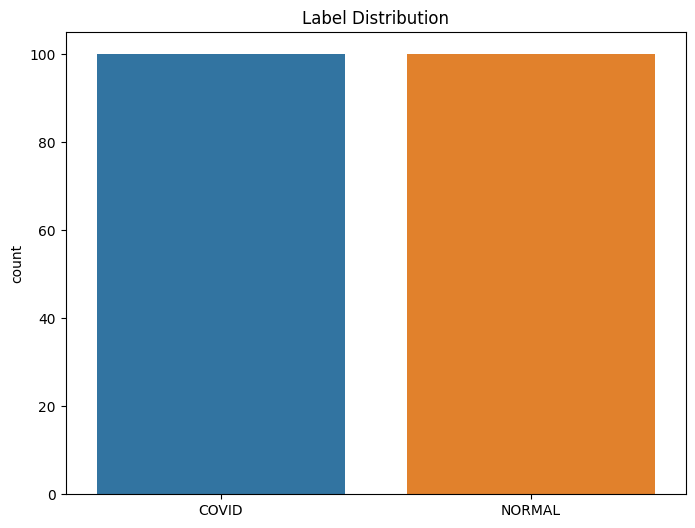

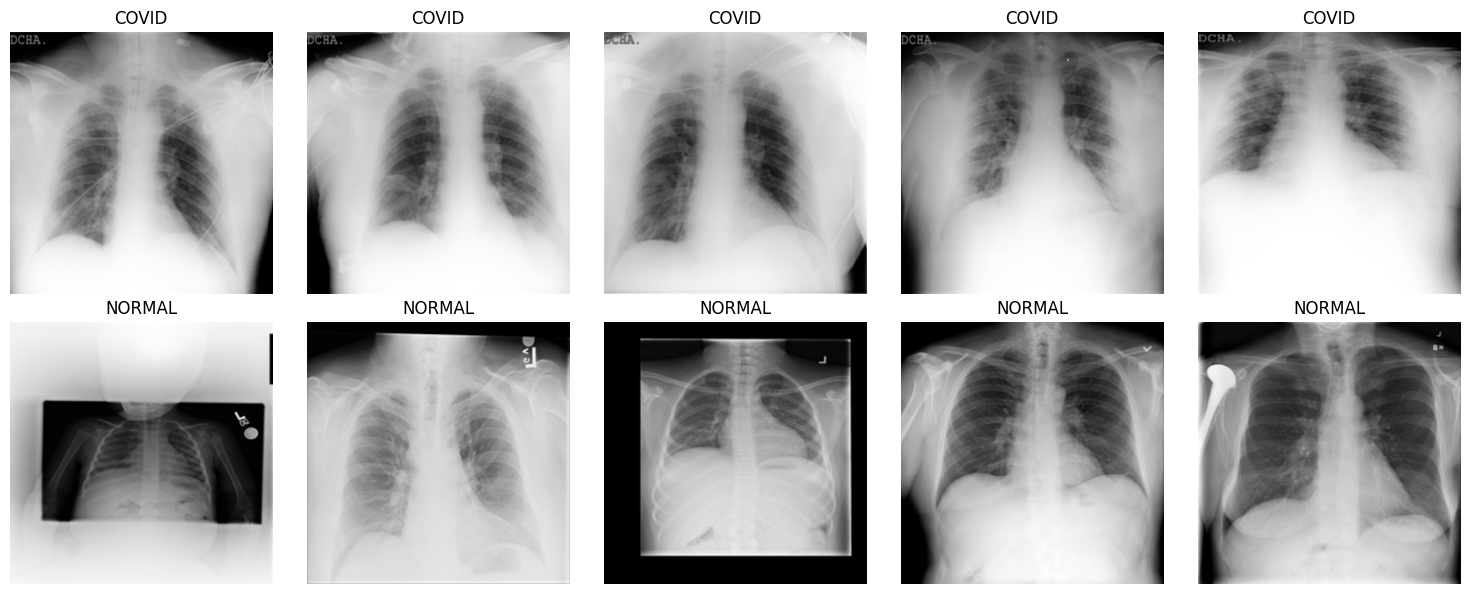

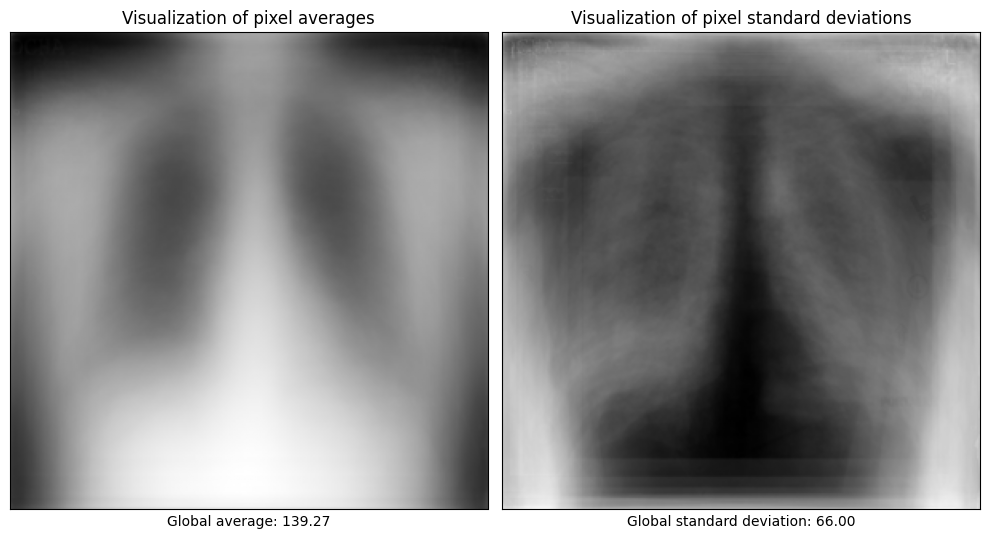

In [96]:
exploration.run_all_exploration(X_test, labels_test)

## 3. Pre-processing

In [97]:
# Optionally, downsample the images by rescaling their size to 128 ×128 pixels.
X_train_downsampled = preprocessing.downsample_images(X_train, 128)
X_val_downsampled = preprocessing.downsample_images(X_val, 128)
X_test_downsampled = preprocessing.downsample_images(X_test, 128)

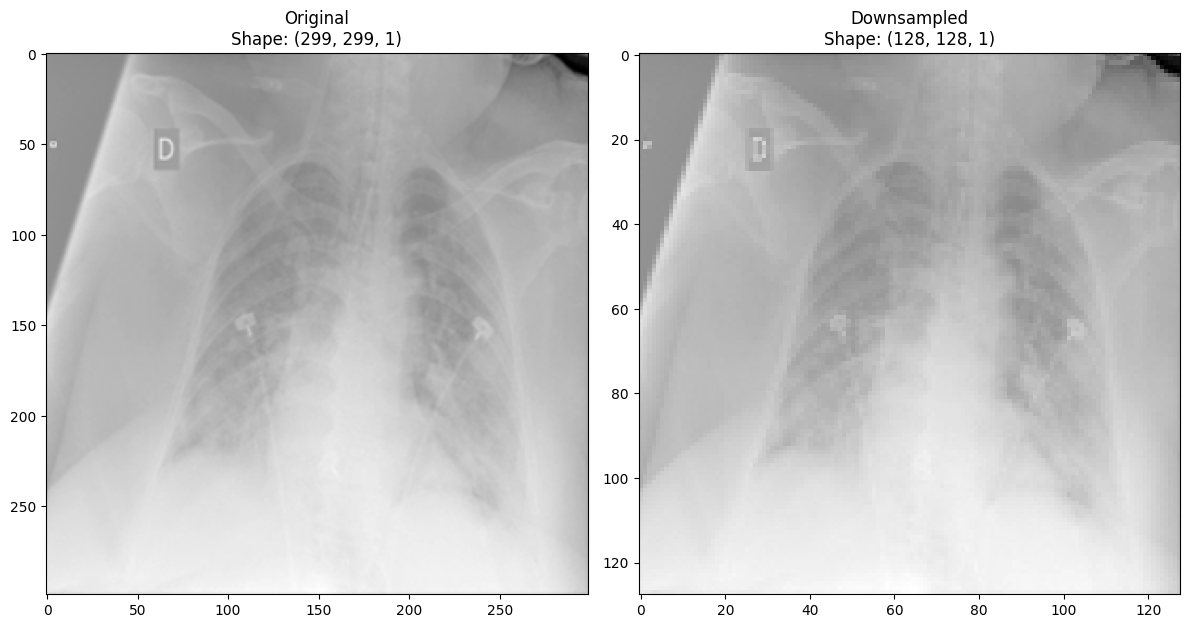

In [98]:
sample_index = 0

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(X_val[sample_index], cmap="gray")
axs[0].set_title(f"Original\nShape: {X_val[sample_index].shape}")

# Downsampled image
axs[1].imshow(X_val_downsampled[sample_index], cmap="gray")
axs[1].set_title(f"Downsampled\nShape: {X_val_downsampled[sample_index].shape}")

plt.tight_layout()
plt.show()

In [99]:
# Implement a normalization strategy, using fixed values, the sample statistics, or the statistics of the training datasets, and test it on a sample from the validation dataset.
training_mean = X_train.mean()
training_std = X_train.std()

X_val_normfixed = preprocessing.normalize_images(X_val, strategy="fixed")
X_val_normsample = preprocessing.normalize_images(X_val, strategy="sample")
X_val_normtraining = preprocessing.normalize_images(
    X_val, 
    strategy="training", 
    training_mean=training_mean, 
    training_std=training_std
)

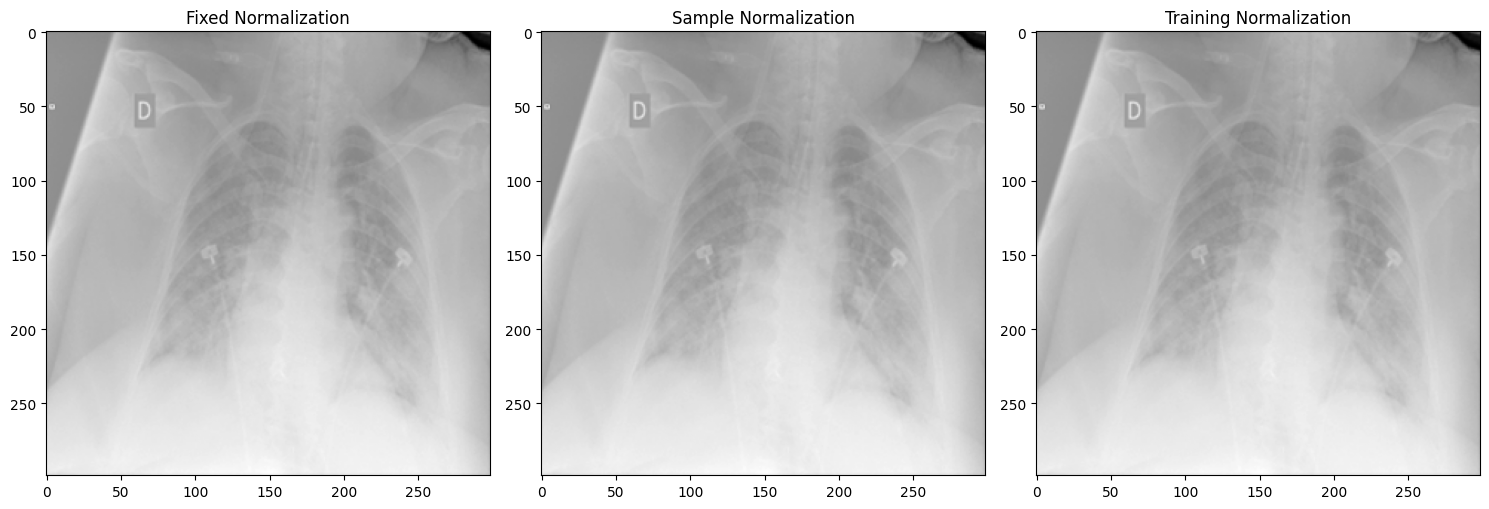

In [100]:
sample_index = 0

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display the fixed normalization image.
axs[0].imshow(X_val_normfixed[sample_index], cmap="gray")
axs[0].set_title("Fixed Normalization")

# Display the sample normalization image.
axs[1].imshow(X_val_normsample[sample_index], cmap="gray")
axs[1].set_title("Sample Normalization")

# Display the training normalization image.
axs[2].imshow(X_val_normtraining[sample_index], cmap="gray")
axs[2].set_title("Training Normalization")

plt.tight_layout()
plt.show()

## 4. Augmentation

In [101]:
# Implement three different relevant types of data augmentation.
random_brightness = RandomBrightness(factor=0.4)
X_train_brightness = random_brightness(X_train)

random_contrast = RandomContrast(factor=0.4)
X_train_contrast = random_contrast(X_train)

random_rotation = RandomRotation((-0.125, 0.125))
X_train_rotation = random_rotation(X_train)

augment = Sequential((random_brightness, random_contrast, random_rotation))
X_train_augment = augment(X_train)

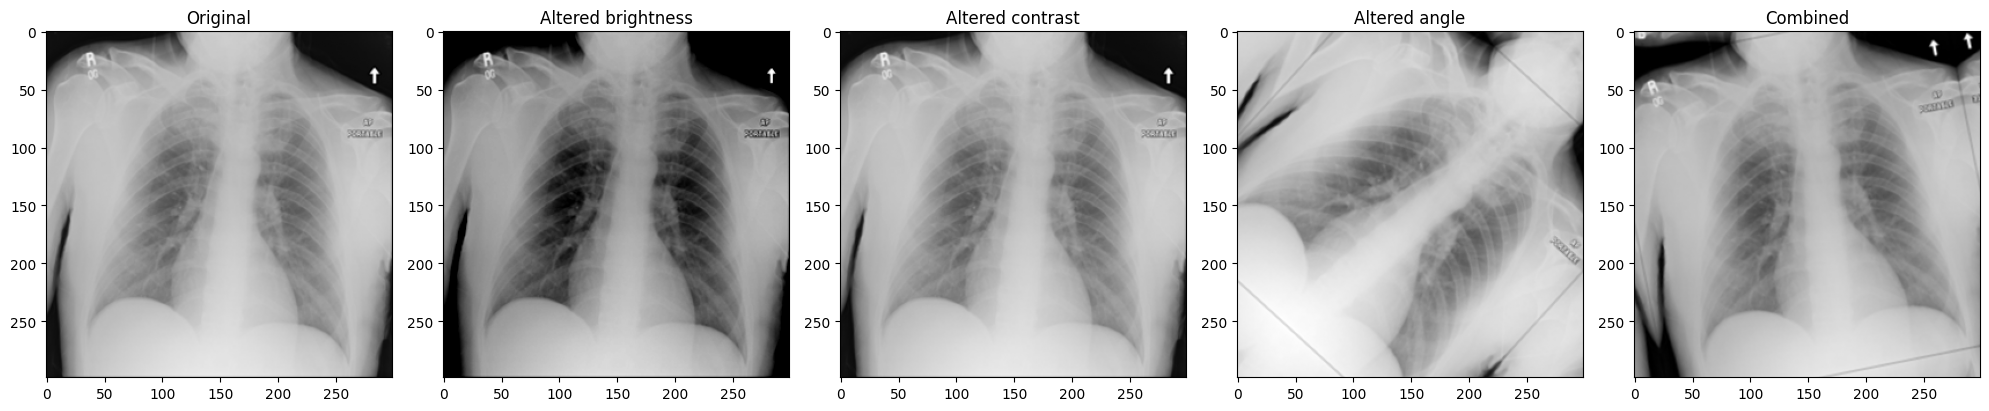

In [102]:
sample_index = 0

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Original image.
axs[0].imshow(X_train[sample_index], cmap="gray")
axs[0].set_title("Original")

# Altered brightness.
axs[1].imshow(X_train_brightness[sample_index], cmap="gray")
axs[1].set_title("Altered brightness")

# Altered contrast.
axs[2].imshow(X_train_contrast[sample_index], cmap="gray")
axs[2].set_title("Altered contrast")

# Altered angle.
axs[3].imshow(X_train_rotation[sample_index], cmap="gray")
axs[3].set_title("Altered angle")

# Combined.
axs[4].imshow(X_train_augment[sample_index], cmap="gray")
axs[4].set_title("Combined")

plt.tight_layout()
plt.show()

## 5) Pipeline

In [ ]:
# Implement the pipelines performing pre-processing and augmentation (only for the training dataset) for your next tasks.

# Augmentation can be implemented in the model as layers (RandomBrightness, RandomContrast and RandomRotation), which work by default only on the training dataset and not the validation dataset.

See `preprocessing` module for custom image generator.

## Questions

**Question 1:** *In what aspects is this dataset challenging for automatic classification in the designated
categories?*

There are enough examples for both classes, the pixel and global statistics between the splits are similar and the resolution is big enough.
Maybe the limitation to grayscale images, low contrasts, different zoom levels and slight variations in angles are problems.

---

**Question 2:** *According to the computed pixel statistics and label distribution, do the training, validation,
and test datasets appear uniformly divided?*

They seem to be uniformly divided (see similarity plotted images of pixel statistics and global statistics).

---

**Question 3:** *Are there any noticeable differences in image quality between the COVID and normal
X-ray images? Could variations in intensity distribution or artifacts affect model performance?*

COVID images seem to be somewhat more white/foggy. This could be a problem if the model classifies based on this brightness and the brightness is unrelated to having COVID or not. If it is unrelated, the model could be not generalizable (maybe it does work for this test set but not for test sets from other sources).

---

**Question 4:** *If not accounted for, the original resolution may lead to unnecessarily extended training
time and memory usage when developing the classifiers, without any performance benefit. How
do you intend to deal with it? Is downsampling a good solution, or would it lead to significant
information loss? Do you have a different approach?*

The downsampling applied here seems to be okay as it is still very clear to the human eye so the model will probably still have enough information to work with. If the images are of good enough quality, there is also the possibility to train on a smaller subsample. 

---

**Question 5:** *Did you normalize the images using fixed values, dataset statistics, or sample statistics?
Did you normalize along the spatial dimensions or normalize each pixel differently? Assuming
a standard convolutional neural network model, which strategy would give the best discriminative
features?*

It is probably better to have images with pixel values in the same range, so normalization over all images using sample statistics seem the best choice?

---

**Question 6:** *Do the augmented images still represent realistic X-ray variations, or could excessive
transformations introduce unrealistic patterns? How can we ensure our model generalizes well to
unseen data?*

Augmentation should only result in images that could occur in test/unseen data. Based on the data we have, intense augmentation doesn't seem necessary?